In [1]:
import pandas as pd
import numpy as npg
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

#load the data and review
df = pd.read_csv('/content/drive/My Drive/bcan_test/cbcan.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4141 entries, 0 to 4140
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ValidTaxID                        4141 non-null   int64  
 1   PropertyName                      4141 non-null   object 
 2   PropertyType                      4141 non-null   object 
 3   GrossAreasqft                     4141 non-null   float64
 4   PropertyUses                      4141 non-null   object 
 5   YearBuilt                         4141 non-null   int64  
 6   ReportYear                        4141 non-null   int64  
 7   BERDOID                           4141 non-null   object 
 8   PropertyOwnerName                 4128 non-null   object 
 9   BuildingAddress                   4135 non-null   object 
 10  BuildingAddressCity               4136 non-null   object 
 11  BuildingAddressZipCode            4141 non-null   object 
 12  Parcel

In [4]:
# prompt: look into column of year built, make a new column of building age, use 2024 minus year built

# Calculate building age
df['Building Age'] = 2024 - df['YearBuilt']
df['Building Age'] = df['Building Age'].astype(int)

In [5]:
df['Building Age'].describe()

,Building Age
count,4141.000000
mean,63.179184
std,39.613132
min,4.000000
25%,27.000000
50%,59.000000
75%,98.000000
max,996.000000


In [6]:
# prompt: remove max value of building age from the df then re describe building age

# Remove rows with the maximum building age
max_building_age = df['Building Age'].max()
df = df[df['Building Age'] != max_building_age]

# Re-describe building age
df['Building Age'].describe()

,Building Age
count,4140.000000
mean,62.953865
std,36.868625
min,4.000000
25%,27.000000
50%,58.500000
75%,98.000000
max,224.000000


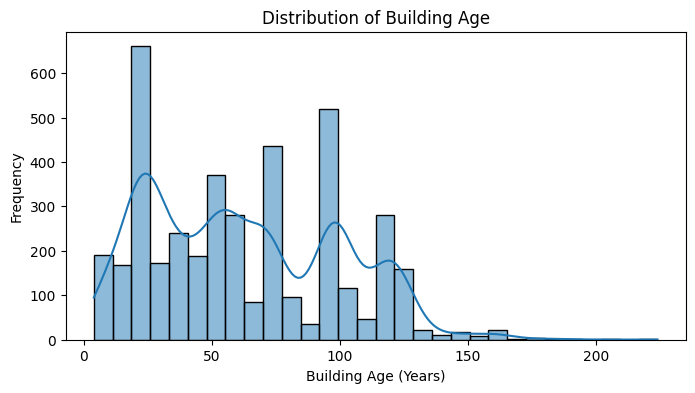

In [7]:
# prompt: visualize building age data with sns package

plt.figure(figsize=(8, 4))
sns.histplot(df['Building Age'], bins=30, kde=True)
plt.title('Distribution of Building Age')
plt.xlabel('Building Age (Years)')
plt.ylabel('Frequency')
plt.show()

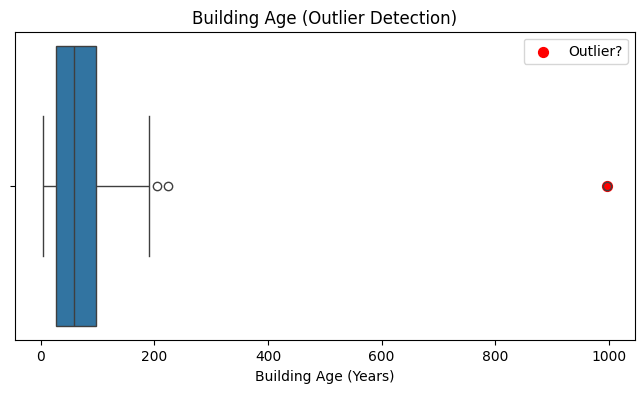

In [52]:

# You can also create a box plot to visualize the distribution of building age
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Building Age'])
plt.title('Building Age (Outlier Detection)')
plt.xlabel('Building Age (Years)')

# Find the maximum value of Building Age
max_building_age = df['Building Age'].max()

# Highlight the maximum point on the box plot
plt.scatter(max_building_age, 0, color='red', marker='o', s=50, label='Outlier?')
plt.legend()

plt.show()

In [8]:
# prompt: find me the info of above outlier

# Find the row with the maximum building age
outlier_row = df[df['Building Age'] == df['Building Age'].max()]

# Print the information of the outlier row
outlier_row

,ValidTaxID,PropertyName,PropertyType,GrossAreasqft,PropertyUses,YearBuilt,ReportYear,BERDOID,PropertyOwnerName,BuildingAddress,...,AllPropertyTypes,EnergyStarScore,TotalSiteEnergyUsagekBtu,NaturalGasUsagekBtu,ElectricityUsagekBtu,ComplianceStatus,BERDOReportStatus,EstimatedTotalGHGEmissionskgCO2e,ElectricVehicleEVCharging,Building Age
1,500020000,2 Park Plaza,Retail Store,117000.0,"Office, Retail Store",1800,2023,106417,TWO PARK PLAZA LLC MASS LLC,2 park plz,...,Office,92,1845367.4,1206453.4,638914.1,In Compliance,7 - Accepted by BERDO Team,114612.8454,No,224


In [9]:
# prompt: according to the distribution, classify building age into 5 buckets, (1-10), (11-30), (31-60), (61-90), (91-120), (>120)

def classify_building_age(age):
  if 1 <= age <= 10:
    return '(1-10 yrs)'
  elif 11 <= age <= 30:
    return '(11-30 yrs)'
  elif 31 <= age <= 60:
    return '(31-60 yrs)'
  elif 61 <= age <= 90:
    return '(61-90 yrs)'
  elif 91 <= age <= 120:
    return '(91-120 yrs)'
  else:
    return '(>120 yrs)'

df['Building Age Category'] = df['Building Age'].apply(classify_building_age)

# Print the DataFrame with the new category column
print(df[['Building Age', 'Building Age Category']])

      Building Age Building Age Category
1              224            (>120 yrs)
2              205            (>120 yrs)
3              190            (>120 yrs)
4              184            (>120 yrs)
5              184            (>120 yrs)
...            ...                   ...
4136             5            (1-10 yrs)
4137             5            (1-10 yrs)
4138             5            (1-10 yrs)
4139             5            (1-10 yrs)
4140             4            (1-10 yrs)

[4140 rows x 2 columns]


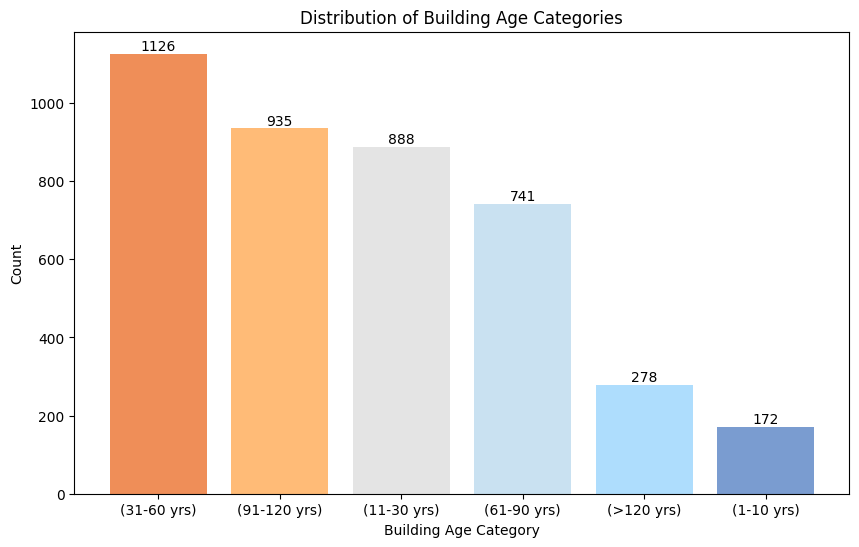

      Building Age Building Age Category
1              224            (>120 yrs)
2              205            (>120 yrs)
3              190            (>120 yrs)
4              184            (>120 yrs)
5              184            (>120 yrs)
...            ...                   ...
4136             5            (1-10 yrs)
4137             5            (1-10 yrs)
4138             5            (1-10 yrs)
4139             5            (1-10 yrs)
4140             4            (1-10 yrs)

[4140 rows x 2 columns]


In [18]:
# prompt: visualize above buckets into different color, colors = ['EF8E58', 'FFBB77', 'E4E4E4', 'C9E1F1', 'AEDDFD', '7A9CD0'], label counts of each buckets at the top


df['Building Age Category'] = df['Building Age'].apply(classify_building_age)

# Count the occurrences of each category
category_counts = df['Building Age Category'].value_counts()

# Define colors for each category
colors = ['#EF8E58', '#FFBB77', '#E4E4E4', '#C9E1F1', '#AEDDFD', '#7A9CD0']

# Create a bar plot with custom colors and category labels on top
plt.figure(figsize=(10, 6))
bars = plt.bar(category_counts.index, category_counts.values, color=colors)
for bar, count in zip(bars, category_counts.values):
  plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, str(count), ha='center', va='bottom')

plt.xlabel('Building Age Category')
plt.ylabel('Count')
plt.title('Distribution of Building Age Categories')
plt.show()

# Print the DataFrame with the new category column
print(df[['Building Age', 'Building Age Category']])

PropertyType
Multifamily Housing           1389
Office                         689
Residence Hall/Dormitory       337
College/University             331
K-12 School                    158
                              ... 
Courthouse                       1
Other - Public Services          1
Other - Stadium                  1
Restaurant                       1
Ambulatory Surgical Center       1
Name: count, Length: 62, dtype: int64


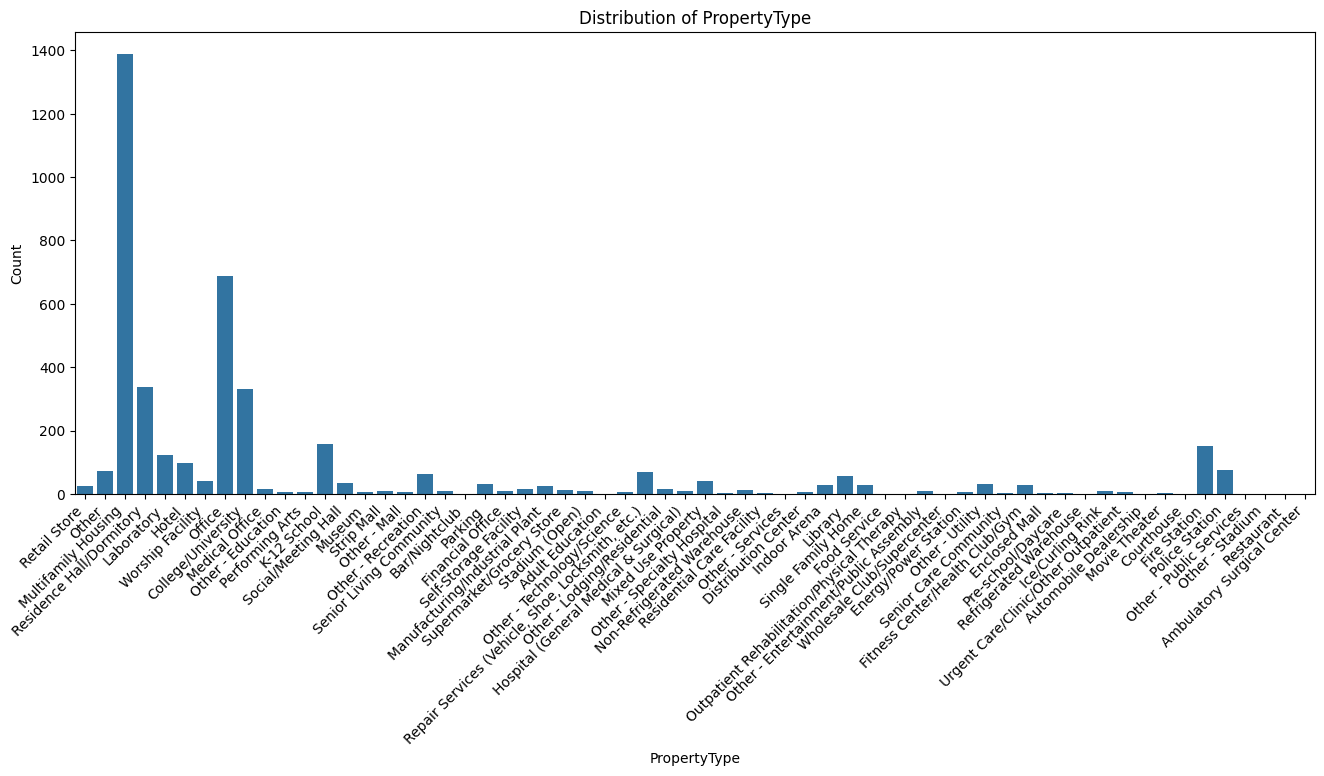

PropertyType
Adult Education                        50.000000
Ambulatory Surgical Center             50.000000
Automobile Dealership                  50.000000
Bar/Nightclub                          50.000000
College/University                     55.438066
                                         ...    
Strip Mall                             50.000000
Supermarket/Grocery Store              61.333333
Urgent Care/Clinic/Other Outpatient    42.000000
Wholesale Club/Supercenter             50.000000
Worship Facility                       61.926829
Name: EnergyStarScore, Length: 62, dtype: float64


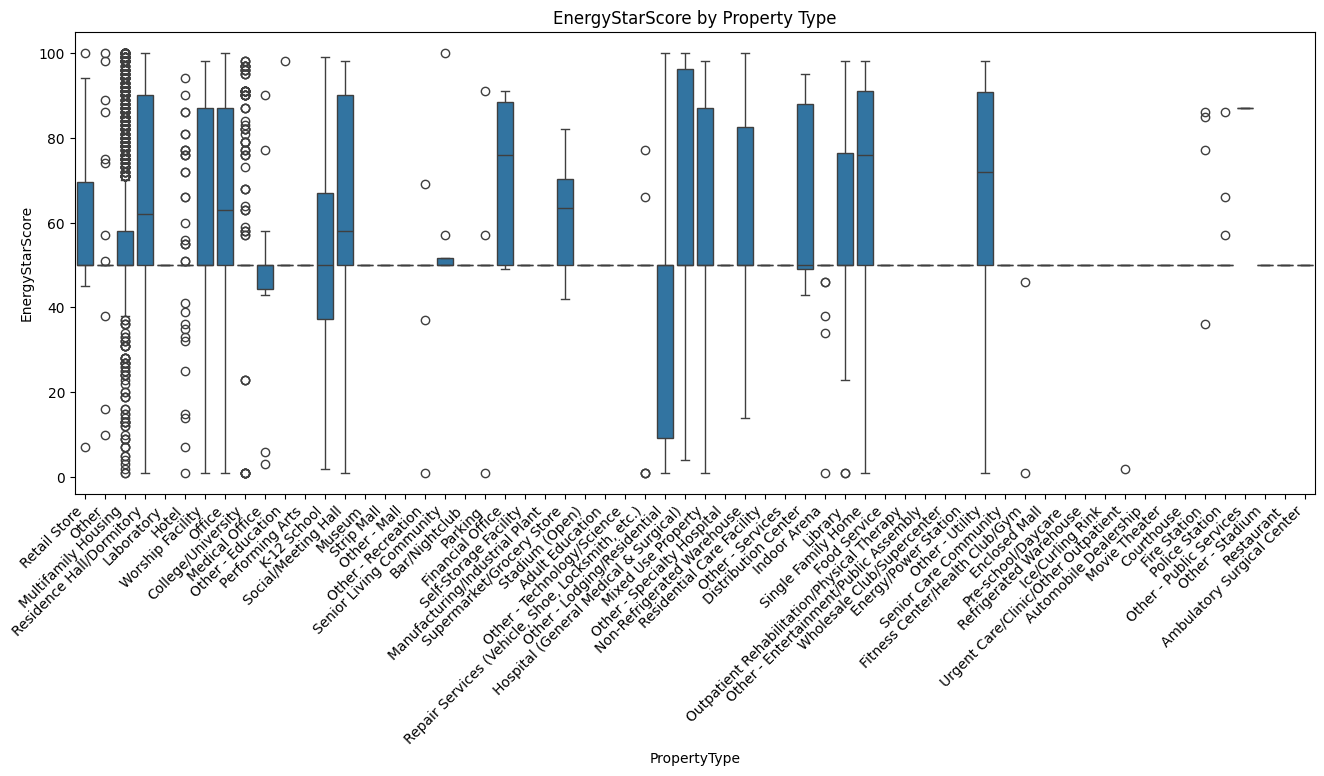

In [27]:
# prompt: analyze PropertyType column

# Analyze PropertyType column
print(df['PropertyType'].value_counts())

# Visualize the distribution of PropertyType
plt.figure(figsize=(16, 6))
sns.countplot(x='PropertyType', data=df)
plt.title('Distribution of PropertyType')
plt.xlabel('PropertyType')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

# You can also explore the relationship between PropertyType and other variables
# For example, you can analyze the average sale price for each PropertyType
average_price_by_property_type = df.groupby('PropertyType')['EnergyStarScore'].mean()
print(average_price_by_property_type)

# You can also visualize this relationship with a box plot or bar plot
plt.figure(figsize=(16, 6))
sns.boxplot(x='PropertyType', y='EnergyStarScore', data=df)
plt.title('EnergyStarScore by Property Type')
plt.xlabel('PropertyType')
plt.ylabel('EnergyStarScore')
plt.xticks(rotation=45, ha='right')
plt.show()

In [38]:
# Assuming 'df' is your DataFrame with a column named 'PropertyType'
unique_property_types = df['PropertyType'].unique().tolist()

# Initialize lists for each category
residential_and_living_spaces = []
commercial_and_retail = []
public_and_community_facilities = []
industrial_and_infrastructure = []
healthcare_and_institutional = []
other = []

# Define the categorization based on all unique types provided
for property_type in unique_property_types:
    if "Other -" and "Other" in property_type:
        other.append(property_type)

    elif property_type in [
        'Multifamily Housing', 'Residence Hall/Dormitory', 'Senior Living Community',
        'Single Family Home', 'Residential Care Facility', 'Senior Care Community', "Hotel"
    ]:
        residential_and_living_spaces.append(property_type)

    elif property_type in [
        'Retail Store', 'Strip Mall', 'Enclosed Mall', 'Supermarket/Grocery Store',
        'Wholesale Club/Supercenter', 'Automobile Dealership', 'Restaurant',
        'Bar/Nightclub', 'Fitness Center/Health Club/Gym', 'Movie Theater', 'Food Service'
    ]:
        commercial_and_retail.append(property_type)

    elif property_type in [
        'Worship Facility', 'Social/Meeting Hall', 'Museum', 'Library', 'Police Station',
        'Fire Station', 'Courthouse', 'Performing Arts', 'K-12 School', 'Pre-school/Daycare',
        'Ice/Curling Rink', 'Stadium (Open)', 'Indoor Arena', "Office", "Financial Office"
    ]:
        public_and_community_facilities.append(property_type)

    elif property_type in [
        'Manufacturing/Industrial Plant', 'Distribution Center', 'Non-Refrigerated Warehouse',
        'Refrigerated Warehouse', 'Energy/Power Station', 'Parking', 'Self-Storage Facility',
        'Repair Services (Vehicle, Shoe, Locksmith, etc.)'
    ]:
        industrial_and_infrastructure.append(property_type)

    elif property_type in [
        'Hospital (General Medical & Surgical)', 'Medical Office',
        'Outpatient Rehabilitation/Physical Therapy', 'Urgent Care/Clinic/Other Outpatient',
        'Ambulatory Surgical Center', 'Laboratory', 'College/University', 'Adult Education',
        'Mixed Use Property'
    ]:
        healthcare_and_institutional.append(property_type)
    else:
        print(f"Uncategorized property type: {property_type}")

# Calculate the total number of categorized types
total_categorized_count = (
    len(residential_and_living_spaces) +
    len(commercial_and_retail) +
    len(public_and_community_facilities) +
    len(industrial_and_infrastructure) +
    len(healthcare_and_institutional) +
    len(other)
)

# Check if all unique property types are categorized
print("Residential and Living Spaces:", len(residential_and_living_spaces), residential_and_living_spaces)
print("Commercial and Retail:", len(commercial_and_retail), commercial_and_retail)
print("Public and Community Facilities:", len(public_and_community_facilities), public_and_community_facilities)
print("Industrial and Infrastructure:", len(industrial_and_infrastructure), industrial_and_infrastructure)
print("Healthcare and Institutional:", len(healthcare_and_institutional), healthcare_and_institutional)
print("Other:", len(other), other)
print("Total categorized types:", total_categorized_count)
print("Total unique types:", len(unique_property_types))

# Check if there's a mismatch
if total_categorized_count == len(unique_property_types):
    print("All property types are categorized correctly.")
else:
    print("There are uncategorized property types.")

Residential and Living Spaces: 7 ['Multifamily Housing', 'Residence Hall/Dormitory', 'Hotel', 'Senior Living Community', 'Residential Care Facility', 'Single Family Home', 'Senior Care Community']
Commercial and Retail: 11 ['Retail Store', 'Strip Mall', 'Bar/Nightclub', 'Supermarket/Grocery Store', 'Food Service', 'Wholesale Club/Supercenter', 'Fitness Center/Health Club/Gym', 'Enclosed Mall', 'Automobile Dealership', 'Movie Theater', 'Restaurant']
Public and Community Facilities: 15 ['Worship Facility', 'Office', 'Performing Arts', 'K-12 School', 'Social/Meeting Hall', 'Museum', 'Financial Office', 'Stadium (Open)', 'Indoor Arena', 'Library', 'Pre-school/Daycare', 'Ice/Curling Rink', 'Courthouse', 'Fire Station', 'Police Station']
Industrial and Infrastructure: 8 ['Parking', 'Self-Storage Facility', 'Manufacturing/Industrial Plant', 'Repair Services (Vehicle, Shoe, Locksmith, etc.)', 'Non-Refrigerated Warehouse', 'Distribution Center', 'Energy/Power Station', 'Refrigerated Warehouse']

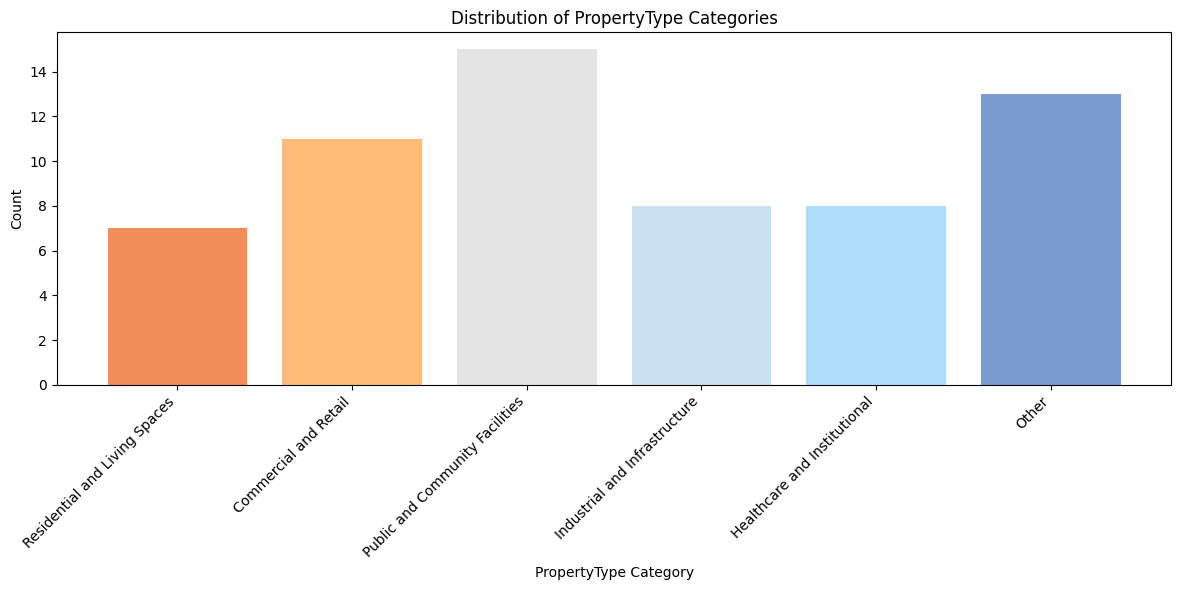

In [43]:
# prompt: visualize property type categories of above six types, colors = ['EF8E58', 'FFBB77', 'E4E4E4', 'C9E1F1', 'AEDDFD', '7A9CD0']

# Assuming 'df' is your DataFrame with a column named 'PropertyType'
# ... (Your existing code for categorizing property types) ...

# Create a bar plot for PropertyType categories
plt.figure(figsize=(12, 6))

# Define the categories and their corresponding counts
categories = [
    'Residential and Living Spaces',
    'Commercial and Retail',
    'Public and Community Facilities',
    'Industrial and Infrastructure',
    'Healthcare and Institutional',
    'Other'
]

counts = [
    len(residential_and_living_spaces),
    len(commercial_and_retail),
    len(public_and_community_facilities),
    len(industrial_and_infrastructure),
    len(healthcare_and_institutional),
    len(other)
]


# Define the colors for the bars
colors = ['#EF8E58', '#FFBB77', '#E4E4E4', '#C9E1F1', '#AEDDFD', '#7A9CD0']

# Create the bar plot with custom colors
plt.bar(categories, counts, color=colors)

plt.xlabel('PropertyType Category')
plt.ylabel('Count')
plt.title('Distribution of PropertyType Categories')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()